# DATA UNDERSTANDING

In [1]:
!pip3 install spotipy --upgrade
!pip3 install pillow

#### Importing Packages

In [33]:
from sklearn.model_selection import train_test_split
from matplotlib import image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections

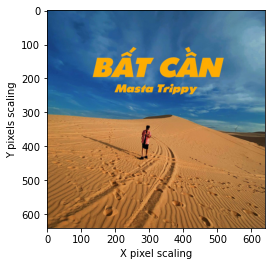

In [3]:
# Displaying example of photo
album_art_example = mpimg.imread(os.getcwd()+"/data/album_art/"+os.listdir('data/album_art')[0])
plt.imshow(album_art_example)

# plt.title("Album Artwork for  "+df.key[0])
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

plt.show()

In [6]:
# importing saved album art files as values in dictionary, with key being the track name. This is so we can later tie the target variable to the features (album art)

# initializing dict
image_dict = {}

# looping through each album art saved
for file in os.listdir("data/album_art/"):
    
    filename = file.split('.jpg')[0]
    
    # assigning track name as key, and value as matrix form of album art (Height, Width, Depth)
    try:
        image_dict[filename] = (mpimg.imread('data/album_art/'+file))
        
        # Not including image if it is not in uniform shape
        if image_dict[filename].shape == (640,640):
                image_dict[filename] = np.stack((image_dict[filename],)*3, axis=-1)
                
                newshape = image_dict[filename].shape
                print(file+' was resized to '+str(newshape)) 
            
        if image_dict[filename].shape != (640,640,3):
            del image_dict[filename]
            
    # created error list to observe files that were not read in properly        
    except:
        print(file+' did not import')

Baby Choppa_2021.jpg was resized to (640, 640, 3)
Say Datt_Hip-Hop.jpg was resized to (640, 640, 3)
.DS_Store did not import
Spirito della Domenica_Italia.jpg was resized to (640, 640, 3)
Consolation Prize_Rock.jpg was resized to (640, 640, 3)
Something_NZ.jpg was resized to (640, 640, 3)
PDF_All Genres.jpg was resized to (640, 640, 3)
HEAVY METAL_2021.jpg was resized to (640, 640, 3)
Rave_All Genres.jpg was resized to (640, 640, 3)
Family Man_Rock.jpg was resized to (640, 640, 3)
concussion_2021.jpg was resized to (640, 640, 3)
Lost_NZ.jpg was resized to (640, 640, 3)
Goner feat Kellin Quinn_Rock.jpg was resized to (640, 640, 3)
White Picket Fence_2021.jpg was resized to (640, 640, 3)
At Least_Folk.jpg was resized to (640, 640, 3)
Portals_R&B.jpg was resized to (640, 640, 3)
Inconsciencia_Latin.jpg was resized to (640, 640, 3)
Rave_Dance.jpg was resized to (640, 640, 3)
BE FREE_R&B.jpg was resized to (640, 640, 3)
Be Your Lover_NZ.jpg was resized to (640, 640, 3)
Grimiest Ever_Dance.j

In [9]:
df = pd.read_csv('data/popularity_index.csv')

In [10]:
# filtering down dataframe so that only the files that were read in properly are included. 
filtered_df = df.loc[df.key.isin(image_dict.keys())]

In [12]:
del_list = []

for key in image_dict.keys():
    if key in df.key.to_list():
        pass
    else:
        print("Could not find associated value for "+key+", delete from the album art dictionary")
        del_list.append(key)
        
for key in del_list:
    del image_dict[key]

Could not find associated value for 4 Ya Kiss_Experimental, delete from the album art dictionary
Could not find associated value for .SYSTVMRVSTVRT, delete from the album art dictionary
Could not find associated value for .SYSTVMRVSTVRT*, delete from the album art dictionary


In [15]:
# Sorting Dictionary to match DataFrame order
image_dict = collections.OrderedDict(sorted(image_dict.items()))

In [16]:
# Checking if order of names matches, so we can accuractly match features with target data. 
filtered_df.key.to_list() == list(image_dict.keys())

True

# -------------------------------------------- DATA PREPARATION --------------------------------------------------------

In [17]:
X = np.array(list(image_dict.values()))

In [18]:
X.shape

(1831, 640, 640, 3)

In [19]:
y = np.array(filtered_df.popularity).reshape(len(filtered_df.popularity), 1)

In [20]:
y.shape

(1831, 1)

In [23]:
# Split the data into Train and Test, so we can later validate our model on "unseen" data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
X_train = X_train / 255
X_test  = X_test  / 255

# ----------------------------------------------------- MODELING ---------------------------------------------------------

#### Baseline Model: Convolutional Neural Network with a flattening layer. 

In [34]:
baseline_model = Sequential()
baseline_model.add(layers.Conv2D(64, kernel_size=(3,3), input_shape = X_train[0].shape))
baseline_model.add(Flatten())
baseline_model.add(layers.Dense(1, activation='linear'))

In [35]:
baseline_model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [ ]:
baseline_history = baseline_model.fit(X_train, y_train, epochs=1, 
                    validation_data=(X_test, y_test))

This model could not run for longer than an epoch due to the amount of computational power required. We will resize the pixels and retry. 